In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data() # we don't need the labels
x_train = x_train.astype('float32') / 255. # normalise
x_test = x_test.astype('float32') / 255.

print(x_train.shape) # shape of input
print(x_test.shape)

x_train = x_train.reshape(( x_train.shape[0], np.prod(x_train.shape[1:]))) #flatten
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [3]:
image_dim =  784 # this is the size of our input image, 784
encoding_dim = 32 # this is the length of our encoded items.Compression of factor=784/32=24.5

In [4]:
input_image = Input(shape=(image_dim, )) # this is our input placeholder

encoded_image = Dense(encoding_dim, activation='relu',
                      activity_regularizer=regularizers.l1(10e-5))(input_image)# "encoded" is the encoded representation of the input
encoder = Model(input_image, encoded_image)

decoded_image = Dense(image_dim, activation='sigmoid')(encoded_image)# "decoded" is the lossy reconstruction of the input

autoencoder = Model(input_image, decoded_image) # this model maps an input to its reconstruction

In [5]:

encoded_input = Input(shape=(encoding_dim,))# create a placeholder for an encoded (32-dimensional) input

decoder_layer = autoencoder.layers[-1]# retrieve the last layer of the autoencoder model

decoder = Model(encoded_input, decoder_layer(encoded_input))# create the decoder model

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
checkpointer1 = ModelCheckpoint(filepath= 'model.weights.best.hdf5' , verbose =2, save_best_only =  True)
checkpointer2 = EarlyStopping(monitor='val_loss',
                              min_delta=0.0005,
                              patience=2,
                              verbose=2, mode='auto')

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,callbacks=[checkpointer1], verbose=2,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500

Epoch 00001: val_loss improved from 0.68544 to 0.68519, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6853 - val_loss: 0.6852
Epoch 2/500

Epoch 00002: val_loss improved from 0.68519 to 0.68494, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6851 - val_loss: 0.6849
Epoch 3/500

Epoch 00003: val_loss improved from 0.68494 to 0.68468, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6848 - val_loss: 0.6847
Epoch 4/500

Epoch 00004: val_loss improved from 0.68468 to 0.68441, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6845 - val_loss: 0.6844
Epoch 5/500

Epoch 00005: val_loss improved from 0.68441 to 0.68414, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6843 - val_loss: 0.6841
Epoch 6/500

Epoch 00006: val_loss improved from 0.68414 to 0.68385, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6840 - val_los

Epoch 52/500

Epoch 00052: val_loss improved from 0.66083 to 0.66002, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6604 - val_loss: 0.6600
Epoch 53/500

Epoch 00053: val_loss improved from 0.66002 to 0.65920, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6596 - val_loss: 0.6592
Epoch 54/500

Epoch 00054: val_loss improved from 0.65920 to 0.65836, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6587 - val_loss: 0.6584
Epoch 55/500

Epoch 00055: val_loss improved from 0.65836 to 0.65750, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6579 - val_loss: 0.6575
Epoch 56/500

Epoch 00056: val_loss improved from 0.65750 to 0.65663, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6570 - val_loss: 0.6566
Epoch 57/500

Epoch 00057: val_loss improved from 0.65663 to 0.65575, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6561 - val_loss: 0.6557
Epoch 58/500

Epoch 00058: val_los

Epoch 103/500

Epoch 00103: val_loss improved from 0.60424 to 0.60299, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6035 - val_loss: 0.6030
Epoch 104/500

Epoch 00104: val_loss improved from 0.60299 to 0.60175, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6022 - val_loss: 0.6018
Epoch 105/500

Epoch 00105: val_loss improved from 0.60175 to 0.60051, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.6010 - val_loss: 0.6005
Epoch 106/500

Epoch 00106: val_loss improved from 0.60051 to 0.59928, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5998 - val_loss: 0.5993
Epoch 107/500

Epoch 00107: val_loss improved from 0.59928 to 0.59805, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5985 - val_loss: 0.5981
Epoch 108/500

Epoch 00108: val_loss improved from 0.59805 to 0.59683, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5973 - val_loss: 0.5968
Epoch 109/500

Epoch 00109: 

Epoch 154/500

Epoch 00154: val_loss improved from 0.55384 to 0.55320, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5532 - val_loss: 0.5532
Epoch 155/500

Epoch 00155: val_loss improved from 0.55320 to 0.55256, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5526 - val_loss: 0.5526
Epoch 156/500

Epoch 00156: val_loss improved from 0.55256 to 0.55194, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5520 - val_loss: 0.5519
Epoch 157/500

Epoch 00157: val_loss improved from 0.55194 to 0.55134, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5513 - val_loss: 0.5513
Epoch 158/500

Epoch 00158: val_loss improved from 0.55134 to 0.55074, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5507 - val_loss: 0.5507
Epoch 159/500

Epoch 00159: val_loss improved from 0.55074 to 0.55016, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5501 - val_loss: 0.5502
Epoch 160/500

Epoch 00160: 

Epoch 205/500

Epoch 00205: val_loss improved from 0.53349 to 0.53328, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5330 - val_loss: 0.5333
Epoch 206/500

Epoch 00206: val_loss improved from 0.53328 to 0.53306, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5328 - val_loss: 0.5331
Epoch 207/500

Epoch 00207: val_loss improved from 0.53306 to 0.53285, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5326 - val_loss: 0.5329
Epoch 208/500

Epoch 00208: val_loss improved from 0.53285 to 0.53265, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5324 - val_loss: 0.5326
Epoch 209/500

Epoch 00209: val_loss improved from 0.53265 to 0.53245, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5322 - val_loss: 0.5324
Epoch 210/500

Epoch 00210: val_loss improved from 0.53245 to 0.53225, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5320 - val_loss: 0.5323
Epoch 211/500

Epoch 00211: 

Epoch 256/500

Epoch 00256: val_loss improved from 0.52620 to 0.52610, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5258 - val_loss: 0.5261
Epoch 257/500

Epoch 00257: val_loss improved from 0.52610 to 0.52601, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5257 - val_loss: 0.5260
Epoch 258/500

Epoch 00258: val_loss improved from 0.52601 to 0.52592, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5256 - val_loss: 0.5259
Epoch 259/500

Epoch 00259: val_loss improved from 0.52592 to 0.52583, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5255 - val_loss: 0.5258
Epoch 260/500

Epoch 00260: val_loss improved from 0.52583 to 0.52574, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5254 - val_loss: 0.5257
Epoch 261/500

Epoch 00261: val_loss improved from 0.52574 to 0.52565, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5253 - val_loss: 0.5257
Epoch 262/500

Epoch 00262: 

Epoch 307/500

Epoch 00307: val_loss improved from 0.52243 to 0.52237, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5220 - val_loss: 0.5224
Epoch 308/500

Epoch 00308: val_loss improved from 0.52237 to 0.52231, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5219 - val_loss: 0.5223
Epoch 309/500

Epoch 00309: val_loss improved from 0.52231 to 0.52225, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5219 - val_loss: 0.5222
Epoch 310/500

Epoch 00310: val_loss improved from 0.52225 to 0.52219, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5218 - val_loss: 0.5222
Epoch 311/500

Epoch 00311: val_loss improved from 0.52219 to 0.52213, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5218 - val_loss: 0.5221
Epoch 312/500

Epoch 00312: val_loss improved from 0.52213 to 0.52207, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5217 - val_loss: 0.5221
Epoch 313/500

Epoch 00313: 

Epoch 358/500

Epoch 00358: val_loss improved from 0.51965 to 0.51960, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5192 - val_loss: 0.5196
Epoch 359/500

Epoch 00359: val_loss improved from 0.51960 to 0.51955, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5192 - val_loss: 0.5195
Epoch 360/500

Epoch 00360: val_loss improved from 0.51955 to 0.51950, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5191 - val_loss: 0.5195
Epoch 361/500

Epoch 00361: val_loss improved from 0.51950 to 0.51945, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5191 - val_loss: 0.5194
Epoch 362/500

Epoch 00362: val_loss improved from 0.51945 to 0.51940, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5190 - val_loss: 0.5194
Epoch 363/500

Epoch 00363: val_loss improved from 0.51940 to 0.51935, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5190 - val_loss: 0.5193
Epoch 364/500

Epoch 00364: 

Epoch 409/500

Epoch 00409: val_loss improved from 0.51714 to 0.51709, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5167 - val_loss: 0.5171
Epoch 410/500

Epoch 00410: val_loss improved from 0.51709 to 0.51704, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5166 - val_loss: 0.5170
Epoch 411/500

Epoch 00411: val_loss improved from 0.51704 to 0.51699, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5166 - val_loss: 0.5170
Epoch 412/500

Epoch 00412: val_loss improved from 0.51699 to 0.51694, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5166 - val_loss: 0.5169
Epoch 413/500

Epoch 00413: val_loss improved from 0.51694 to 0.51689, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5165 - val_loss: 0.5169
Epoch 414/500

Epoch 00414: val_loss improved from 0.51689 to 0.51684, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5165 - val_loss: 0.5168
Epoch 415/500

Epoch 00415: 

Epoch 460/500

Epoch 00460: val_loss improved from 0.51458 to 0.51453, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5141 - val_loss: 0.5145
Epoch 461/500

Epoch 00461: val_loss improved from 0.51453 to 0.51448, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5141 - val_loss: 0.5145
Epoch 462/500

Epoch 00462: val_loss improved from 0.51448 to 0.51442, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5140 - val_loss: 0.5144
Epoch 463/500

Epoch 00463: val_loss improved from 0.51442 to 0.51437, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5140 - val_loss: 0.5144
Epoch 464/500

Epoch 00464: val_loss improved from 0.51437 to 0.51432, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5139 - val_loss: 0.5143
Epoch 465/500

Epoch 00465: val_loss improved from 0.51432 to 0.51427, saving model to model.weights.best.hdf5
60000/60000 - 1s - loss: 0.5139 - val_loss: 0.5143
Epoch 466/500

Epoch 00466: 

In [10]:
# encode and decode some items
# note that we take them from the *test* set

autoencoder.load_weights('model.weights.best.hdf5' )
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

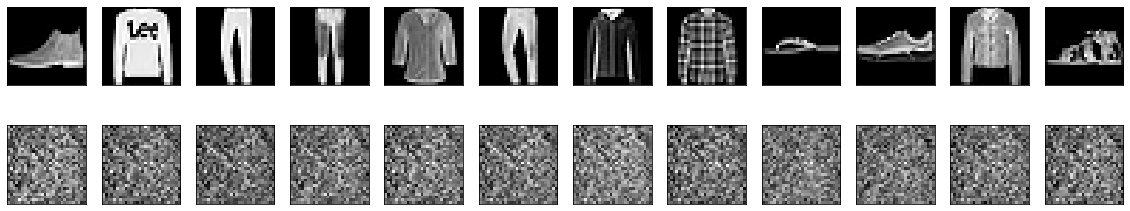

In [11]:
number_of_items = 12  # how many tems we will display
plt.figure(figsize=(20, 4))
for i in range(number_of_items):
    # display items before compression
    graph = plt.subplot(2, number_of_items, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)

    # display items after decompression
    graph = plt.subplot(2, number_of_items, i + 1 + number_of_items)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)
plt.show()